In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#make numpy printouts easier to read
np.set_printoptions(precision=3, suppress=True)

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [8]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylynders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', 
                      comment = '\t', sep=' ', skipinitialspace= True)

In [9]:
dataset.tail()

,MPG,Cylynders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [10]:
#clean data
dataset= dataset.dropna()

In [11]:
#convert categorical "Origin" data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin ==1)*1
dataset['Europe']= (origin ==2)*1
dataset['Japan']= (origin ==3)*1

In [12]:
dataset.tail()

,MPG,Cylynders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [13]:
#split data into training and test set
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylynders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [14]:
#split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#setup a lable (MPG as label) for train/test data 
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [17]:
def plot(feature, x=None, y=None):
  plt.figure(figsize=(10,8))
  plt.scatter(train_features[feature], train_labels, label = 'Data')
  if x is not None and y is not None:
    plt.plot(x, y, color ='k', lable='Predictions')
  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()

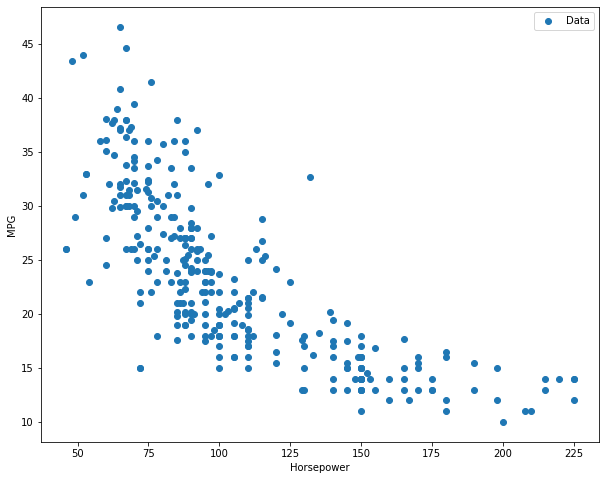

In [18]:
plot('Horsepower')

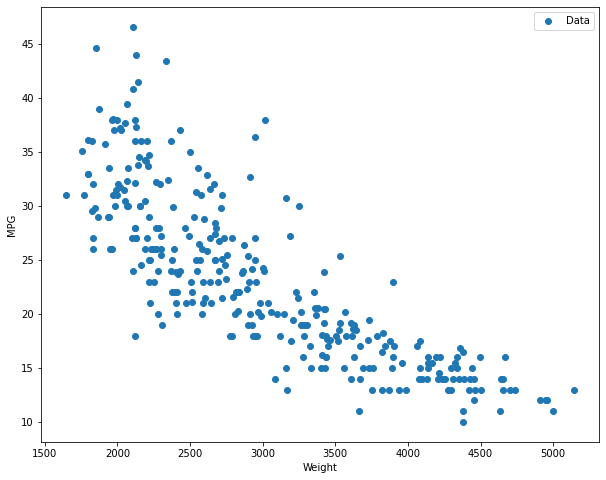

In [19]:
plot('Weight')